# PHÂN TÍCH TƯƠNG TÁC BÀI VIẾT.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\cmdoptions.py", line 23, i

## Thông tin sơ lược.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
# Đọc file csv sau khi lưu, bao gồm 100 post.
raw_df = pd.read_csv('Data/hotwheels_done.csv')
len(raw_df)
path = 'Data/hotwheels_done.npy'
post_list = np.load(path,allow_pickle = True)

In [53]:
# Thông tin về dữ liệu của dataframe.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      100 non-null    int64 
 1   post_id         100 non-null    int64 
 2   text            100 non-null    object
 3   time            100 non-null    object
 4   timestamp       100 non-null    int64 
 5   comments        100 non-null    int64 
 6   shares          100 non-null    int64 
 7   user_id         100 non-null    int64 
 8   comments_full   100 non-null    object
 9   reactions       100 non-null    object
 10  reaction_count  100 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 8.7+ KB


## =======================================================================================================

## Phân tích bài viết gần nhất.

In [54]:
# Lượt tương tác (reactions, comments và shares) của bài viết gần nhất.
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

2065
210
364


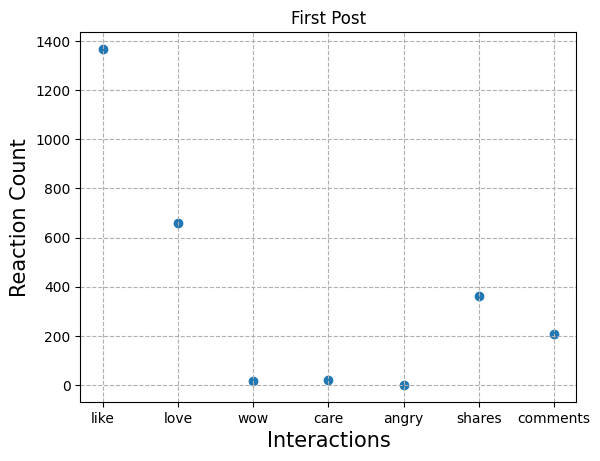

In [55]:
print(raw_df['reaction_count'][0])
print(raw_df['comments'][0])
print(raw_df['shares'][0])

x = reactions.keys()
y = reactions.values()
plt.scatter(x,y)
plt.grid("dark", linestyle = "--")

plt.title('First Post')
plt.xlabel("Interactions", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

plt.savefig("Biểu đồ/1.png")

## =====================================================================================================

## Bài viết có số reactions lớn nhất và bé nhất.

In [56]:
# Bài viết có số reactions lớn nhất của trong 100 bài crawl về - 9500 reactions.

highest_reaction_count = max(raw_df['reaction_count'])
highest_post = raw_df[raw_df['reaction_count'] == highest_reaction_count]
highest_post[['post_id', 'text', 'time', 'reaction_count']]

,post_id,text,time,reaction_count
45,636367022015466,"Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends",2023-09-23 23:30:25,9500


In [57]:
# Bài viết có số reactions thấp nhất trong 100 bài crawl về - 9 reactions.

lowest_reaction_count = min(raw_df['reaction_count'])
lowest_post = raw_df[raw_df['reaction_count'] == lowest_reaction_count]
lowest_post[['post_id', 'text', 'time', 'reaction_count']]

,post_id,text,time,reaction_count
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",2023-11-08 06:00:47,9


In [58]:
# Số reactions trung bình của 100 bài.

average_reaction_count = raw_df['reaction_count'].mean()
average_reaction_count

707.65

45    2023-09-23 23:30:25
Name: time, dtype: object
1    2023-11-08 06:00:47
Name: time, dtype: object


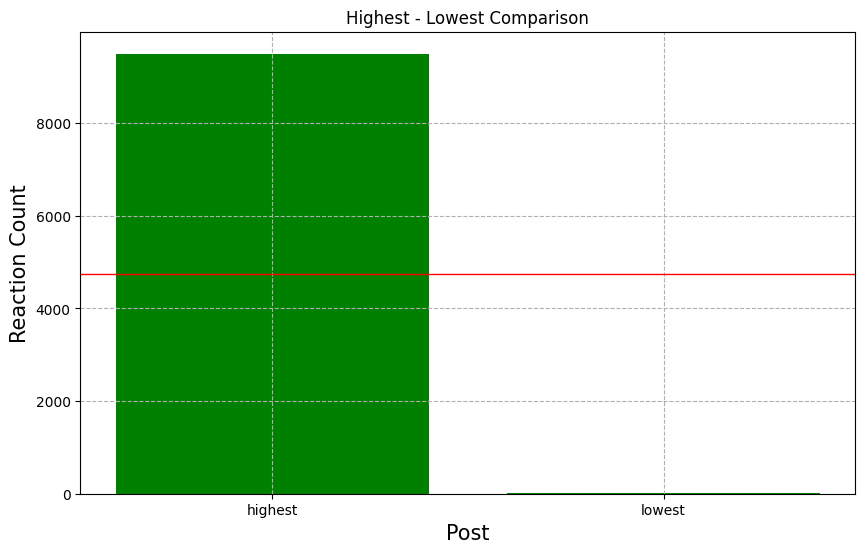

In [59]:
# Thời gian của hai bài đăng trên.
a = highest_post['time']
b = lowest_post['time']
print(a)
print(b)

# Biểu đồ so sánh của hai bài đăng.
plt.figure(figsize = (10,6))
plt.title('Highest - Lowest Comparison')
plt.xlabel("Post", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

x = ["highest", "lowest"]
y = [highest_reaction_count, lowest_reaction_count]

plt.bar(x,y, color = 'green')
plt.grid("dark", linestyle = "--")
plt.axhline(y = np.nanmean(y), color = 'red', linestyle = '-', linewidth = 1, label = 'avg')

plt.savefig("Biểu đồ/2.png")

In [60]:
# Lấy ra nội dung bài đăng nhiều reactions nhất.

content1 = highest_post['text']
pd.set_option('display.max_colwidth', None)
content1

45    Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends
Name: text, dtype: object

In [65]:
# Lấy ra nội dung bài đăng ít reactions nhất.

content2 = lowest_post['text']
pd.set_option('display.max_colwidth', None)
content2

1    Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG
Name: text, dtype: object

## =====================================================================================================================================================

## Sự biến động của lượng reactions theo dòng thời gian.

In [66]:
# Lấy ra dataframe check gồm 3 cột time, timestamp và reaction_count để thống kê, và đảo lại dataframe.
check = raw_df[['post_id', 'time', 'reaction_count']]

C:\Users\HP\AppData\Local\Temp\ipykernel_9724\422525088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['time'] = pd.to_datetime(check['time'])


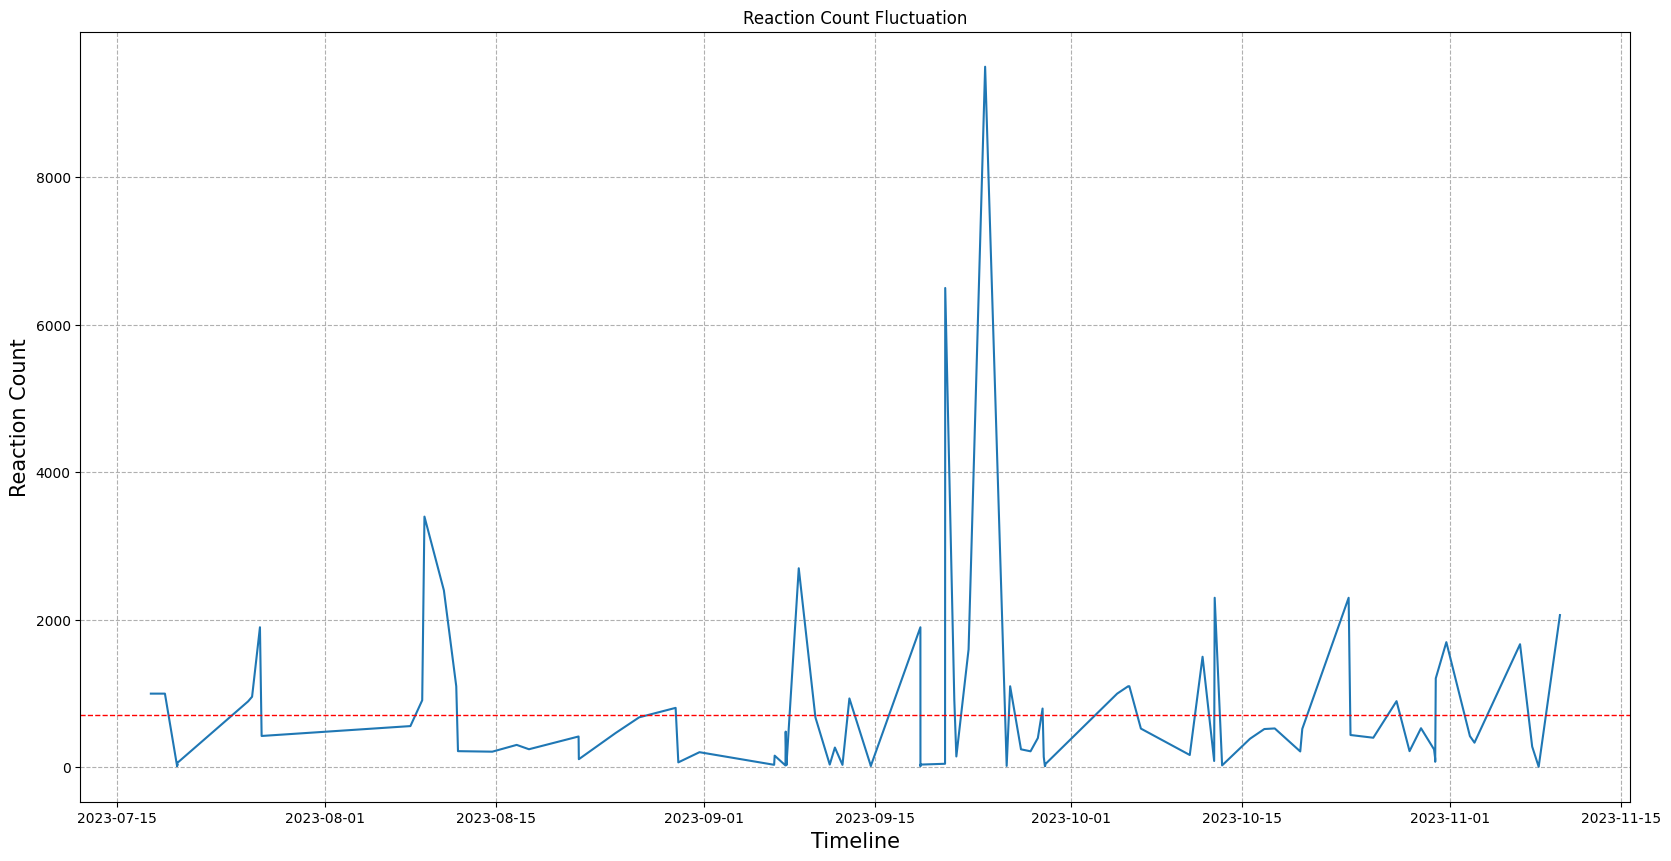

In [68]:
# Biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ qúa khứ đến hiện tại
check['time'] = pd.to_datetime(check['time'])
x = check['time']
y = check['reaction_count']

plt.figure(figsize = (20,10))
plt.plot(x,y)
plt.grid("dark", linestyle = "--")
plt.title('Reaction Count Fluctuation')
plt.xlabel("Timeline", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)


plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')

plt.savefig("Biểu đồ/3.png")


Như ta có thể thấy trong biểu đồ đường ở trên, fanpage của "Hotwheels" có lượt số tương tác không ổn định theo thời gian, với nhiều những điểm nhọn (spikes) phân bố không đồng đều. Lượng reaction thấp nhất được ghi nhận là 9, và cao nhất là 9500, với điểm nhọn nổi bật xuất hiện trong 2 tuần cuối cùng của tháng 9/2023. Lượng react trung bình trên trục thời gian giới hạn là ~ 707 reacts, được biểu diễn bằng đường nét đứt màu đỏ.

Hơn nữa, ta có thể thấy từ tháng 9/2023, fanpage Hot Wheels đã đăng bài viết với tần suất cao hơn tương ứng với nhiều điểm phân bố dày đặc hơn trong biểu đồ (mỗi chấm là một số lượng reactions, tương ứng với 1 bài viết). Trong mục phân tích bài viết, ta nhận ra 18% là bài viết về Hot Wheels Legends Tour - một sự kiện quy mô rất lớn, kéo dài từ tháng 5 đến giữa tháng 11. Tháng 9 nằm giữa tháng 5 và tháng 11, là thời điểm sự kiện bắt đầu nóng lên, các vòng bình chọn ít dần số ứng viên và người chiến thắng lần lộ diện. Chính vì lí do đó, họ đã đẩy mạnh đăng bài, "mượn gió bẻ măng", vừa để cập nhật cuộc thi, vừa để quảng bá và thu về tương tác.  

## ========================================================================================================

## Thống kê xu hướng tương tác.

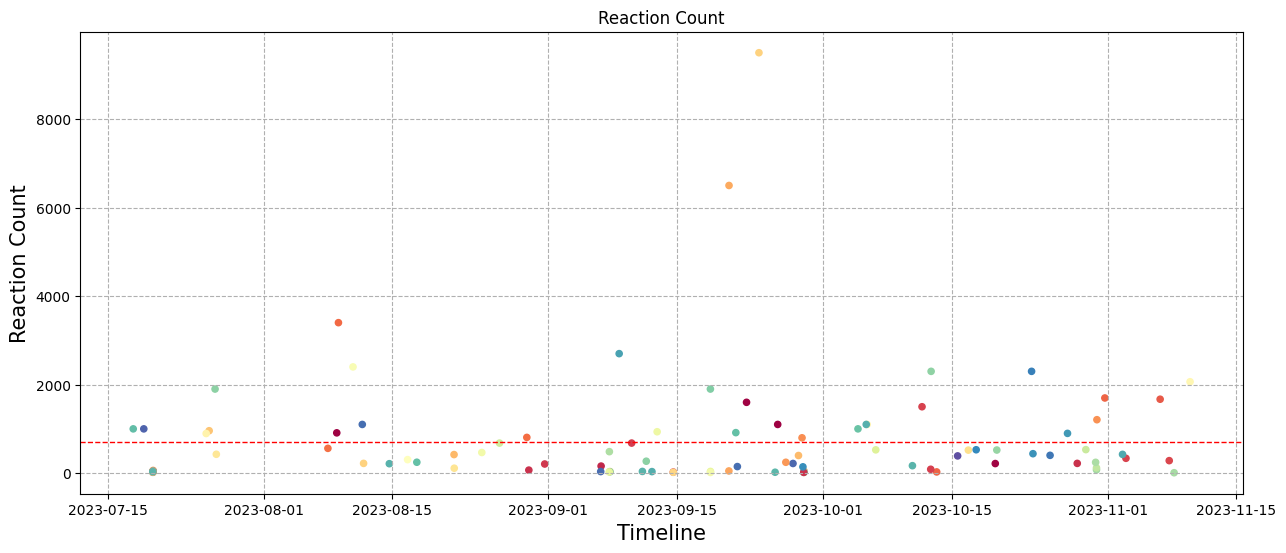

In [71]:
# Biểu đồ phân tán của reactions.
colors = np.random.rand(100)

plt.figure(figsize = (15,6))
plt.title('Reaction Count')
plt.xlabel("Timeline", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

plt.scatter(x, y, s = 20, c = colors, alpha = 1, cmap = 'Spectral')
plt.grid("dark", linestyle = "--")
plt.axhline(y = np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')

plt.savefig("Biểu đồ/4.png")


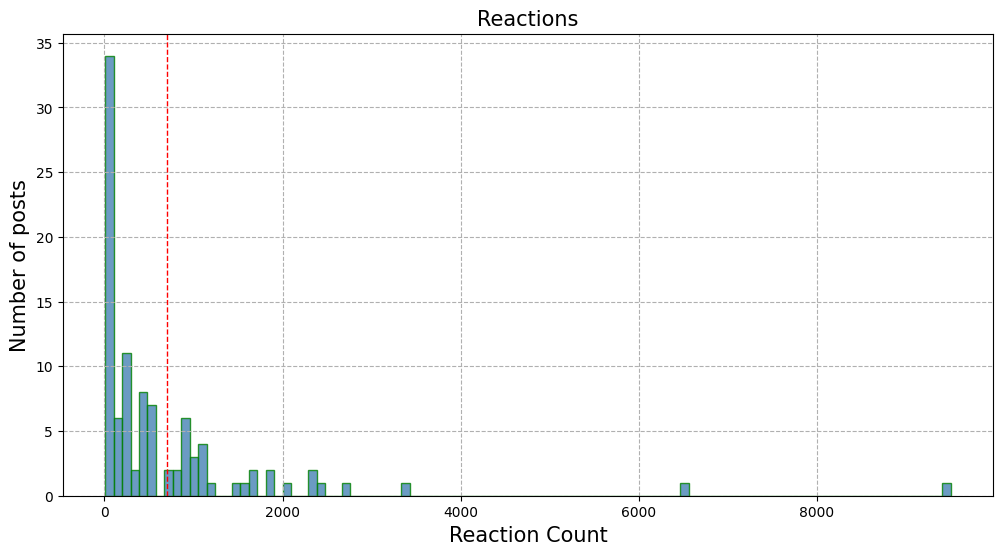

In [73]:
# Biểu đồ thống kê số bài viết với lượng reactions.
plt.subplots(figsize = (12, 6))
plt.hist(y, bins = 100, alpha = 0.8,
          histtype = 'bar', color = 'steelblue',
          edgecolor = 'green')

plt.axvline(y.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.grid("dark", linestyle = "--")
plt.title('Reactions', fontsize = 15)
plt.xlabel("Reaction Count", fontsize = 15)
plt.ylabel("Number of posts", fontsize = 15)

plt.savefig("Biểu đồ/5.png")

Đổi qua biểu đồ phân tán và biểu đồ cột, ta thấy khá nhiều bài viết có số reactions nằm dưới mức bình quân, một số nhỏ hơn bài viết trên trung bình, và khoảng 2 bài viết xấp xỉ bình quân. Với 3 triệu người theo dõi, con số này là vô cùng bé, tỷ lệ trung bình 707 (trung bình lượt reactions mỗi bài)/3000000 (số người theo dõi) ~ 1/5000. Có nghĩa là trong 5000 người mới có 1 người để lại tương tác. Con số này sẽ có hai trường hợp xảy ra: 

Một là, người dùng lười tương tác, xem các bài đăng chỉ đọc nội dung rồi lướt tiếp, chỉ những bài viết họ muốn xem ý kiến và phản ứng của cộng đồng thì mới mở comment lên đọc, hoặc bình luận những gì mình nghĩ.

Hai là, các bài đăng chưa đánh trúng thị hiếu người xem. Trường hợp này khó có thể kiểm chứng được do không đủ dữ liệu, nhưng những bài viết nhàm chán hay lặp lại sẽ bị lướt qua, hoặc đọc một vài dòng đầu nội dung rồi bỏ qua. Con số thấp này sẽ phản ánh nội dung mà fanpage đăng tải chưa thực sự có giá trị, và thúc đẩy bộ phận admin, người đăng bài làm tốt hơn. Nhưng trường hợp này chưa chắc đã xảy ra, khi mà những bài đăng đôi lúc không được nhìn thấy bởi người dùng do các bài viết mới được đẩy lên trên làm trôi đi, và người dùng chưa lướt đủ xa để đọc được, hoặc một thời gian sau mới thấy.

Mức độ tương tác thấp không xấu, và nó cũng không ảnh hưởng tới độ phổ biến của fanpage lớn với số lượng người theo dõi lớn - trên 3 triệu và có tích xanh (chính thống) khi mà có những bài đăng chỉ mang tính chất thông báo và thông tin, nên dù khô khan rườm rà, nó vẫn cần được đăng tải. Đối với những trang facebook nhỏ hơn, thì điều này với họ là quan trọng bởi nhiều tương tác sẽ kéo theo lượng người theo dõi tăng (được facebook gợi ý + ấn tượng tốt khi nhìn vào) và những trang này ít hoặc không quảng cáo. Chính vì vậy, khi xây dựng trang facebook, đưa ra những bài đăng chất lượng và nắm bắt xu hướng là một trong những việc quan trọng bậc nhất.

## ==================================================================================================


## So sánh các chỉ số tương tác khác nhau.

In [ ]:
compare = raw_df[['post_id', 'text', 'time', 'timestamp', 'reaction_count', 'comments', 'shares']].iloc[::-1]
compare

,post_id,text,time,timestamp,reaction_count,comments,shares
99,599621192356716,"Meet 'Tootsie', a 1985 Mercedes-Benz 300D, who now reigns as the finalist at the Hot Wheels Legends Tour Houston stop! 🎉\r\n\r\nBuilt for both function and fun, this reimagined classic flaunts bold fender flairs, a custom lifted suspension, and an unmissable exhaust exiting through the hood.\r\n\r\nThis yard ornament transformed into rally royalty was a collaboration of 30+ students and one passionate teacher from Dekaney High School's Automotive Technology Program. After countless hours of hard work, Tootsie’s journey is a testament to ingenuity and teamwork. Congratulations to David Almanzan and his incredible team of students. 🙌💥🏎️",2023-07-17 18:00:08,1689616808,1000,64,94
98,600244618961040,"Join Hot Wheels, NBC, Rutledge Wood and Dalal Elsheikh tonight at 10PM ET on Threads to live-thread all things Hot Wheels: Ultimate Challenge.",2023-07-18 21:36:24,1689716184,1000,74,73
97,300656448999300,"SUN, SEP 4\r\nHot Wheels Monster Trucks Live!",2023-07-19 21:08:47,1689800927,32,22,0
96,998235587977759,"SUN, SEP 4\r\nHot Wheels Monster Trucks Live!",2023-07-19 21:19:33,1689801573,20,15,0
95,130770646693712,"SUN, SEP 11\r\nHot Wheels Monster Trucks Live!",2023-07-19 21:30:06,1689802206,19,5,0
...,...,...,...,...,...,...,...
4,1276112246404579,"Join us for the Semi-Finals of the Hot Wheels Legends Tour! Watch LIVE judging from a panel of celebrities and top motorsport athletes, including Coco Zurita, Aimee Shackelford, and Eric Kendricks\r\nThe Hot Wheels Legends Tour, now in its sixth year, is a global search for the next fan-made custom car to be made into a Hot Wheels die-cast.\r\n\r\nThe Hot Wheels Legends Tour is made possible in partnership with Walmart and Presenting Sponsor, Mobil 1.\r\nLearn more about the Hot Wheels Legends Tour at www.hotwheels.com/legends",2023-11-03 00:00:18,1698969618,335,493,56
3,661756316143203,"This Saturday marks the sixth Hot Wheels Legends Tour Global Finale.\r\n\r\nBefore we crown a new winner, let’s open up the vault and take a look back at all of our previous winners. 🏆",2023-11-06 17:27:08,1699291628,1670,90,212
2,662301126088722,Tune in this Saturday for the Hot Wheels Legends Tour Global Grand Finale and see which car will be chosen to be immortalized into a Hot Wheels 1:64 scale die-cast.\r\n\r\nStreaming live 11.11.2023 at 9am PST on Hot Wheels social channels and MattelCreations.com.,2023-11-07 17:15:04,1699377304,282,58,39
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",2023-11-08 06:00:47,1699423247,9,0,1


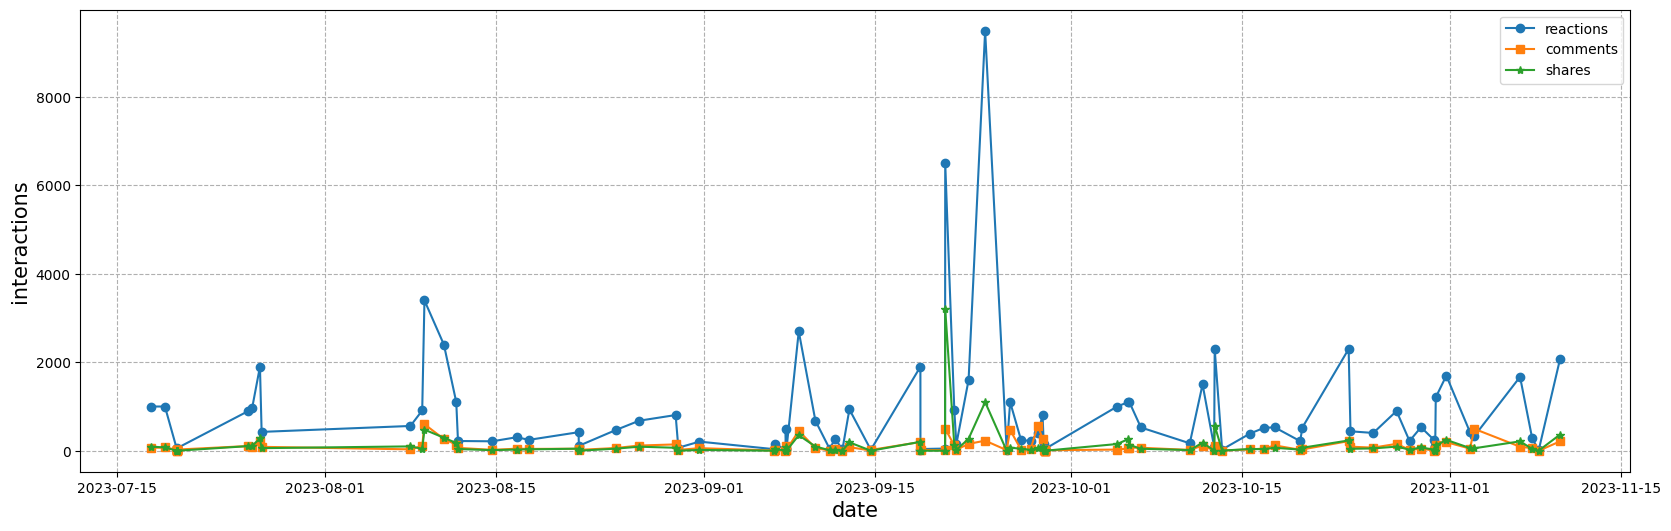

In [ ]:
compare['time'] = pd.to_datetime(compare['time'])
dates = compare['time']
x = compare['reaction_count']
y = compare['comments']
z = compare['shares']

plt.figure(figsize = (20,6))
plt.xlabel("date", fontsize = 15)
plt.ylabel("interactions", fontsize = 15)

plt.plot(dates, x, label = "reactions", marker = "o")
plt.plot(dates, y, label = "comments", marker = "s")
plt.plot(dates, z, label = "shares", marker = "*")
plt.grid("dark", linestyle = "--")

plt.legend()

plt.savefig("Biểu đồ/6.png")

Như biểu đồ ở trên, ta thấy số comments và shares có tỷ lệ 99% thấp hơn số reactions do 2 phương thức tương tác này cần nhiều công sức và thao tác hơn, so với reaction là 1 lần bấm. Nhìn chung, số comments và shares luôn nhỏ hơn 10% số reactions. Khi lướt Facebook, nhiều người dùng có xu hướng lướt nhanh, lướt nhiều (lí do được gọi là "lướt") hơn là ở lại một bài viết và xem xét kỹ càng và chăm chỉ tương tác, nên xu hướng ở trên là hợp lý.

## ==========================================================================================================================

## Trích xuất comment của bài đăng.

In [ ]:
post_list = post_list.tolist()

In [ ]:
# Thuật toán in ra toàn bộ comments và thông tin của người comment theo từng bài viết.
x = len(raw_df['comments_full'])
res = []
for i in range(x):
    res.append(raw_df['comments_full'][i]) 
res

['[{\'comment_id\': \'1085531565938845\', \'comment_url\': \'https://facebook.com/1085531565938845\', \'commenter_id\': \'100001757861021\', \'commenter_url\': \'https://facebook.com/mikey.brown.338211?eav=Afa3xpPpHL72UkGxYM5RxhfGVEExp2bKHZvFOuVwKszJNLHhEj6jld49EUy5hi-GAhE&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Mikey Brown\', \'commenter_meta\': None, \'comment_text\': \'Can’t wait to see ya there ✌️\', \'comment_time\': datetime.datetime(2023, 11, 9, 9, 0), \'comment_image\': \'https://scontent-sin6-4.xx.fbcdn.net/v/t39.30808-6/399029486_6802447256490469_7293078181442293530_n.jpg?stp=cp0_dst-jpg_e15_q65_s180x540&_nc_cat=101&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=KQew9jea0jIAX8YmRSh&_nc_ht=scontent-sin6-4.xx&oh=00_AfAuyC4-F1W47L7FUj720VidVVhrfij41WE_nBIHR-tZMw&oe=6553C36A\', \'comment_reactors\': [{\'name\': \'Sawyer Kayden\', \'link\': \'https://facebook.com/profile.php?id=100082138123979&eav=Afagr0sfpBu8my4n_HmfnWhIlD4_eq5YKD1pE53mhh8_PzwgXmDXsxgz